In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
val_targets = []  # True labels: [0, 1, 0, 1, ...]
val_preds = []    # Model outputs after sigmoid threshold: [0, 1, 0, 1, ...]


In [7]:
import torch
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)
from deepfake_cnn_rnn_train import DeepfakeCNNRNN  # Use your actual file name

# Load model architecture and weights
model = DeepfakeCNNRNN()
model.load_state_dict(torch.load("deepfake_cnn_rnn.pth"))
model.eval()

# Load data
df = pd.read_csv("deepfaketimit_with_videoid.csv")

# Split features and labels
features = df.iloc[:, 1:-1].values  # Skip video_id and label column
labels = df.iloc[:, -1].values

# Convert to tensors
X = torch.tensor(features, dtype=torch.float32)
y_true = torch.tensor(labels, dtype=torch.float32)

# Make predictions
with torch.no_grad():
    outputs = model(X)
    probs = outputs.squeeze()
    preds = (probs >= 0.5).int()

# Convert to numpy arrays for sklearn
y_true_np = y_true.numpy().astype(int)
y_pred_np = preds.numpy()

# Compute metrics
acc = accuracy_score(y_true_np, y_pred_np)
prec = precision_score(y_true_np, y_pred_np, zero_division=0)
rec = recall_score(y_true_np, y_pred_np)
f1 = f1_score(y_true_np, y_pred_np)

# Sensitivity and specificity from confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true_np, y_pred_np).ravel()
sensitivity = rec  # TP / (TP + FN)
specificity = tn / (tn + fp)

# Print results
print("\n📊 Evaluation Metrics:")
print(f"✅ Accuracy     : {acc:.4f}")
print(f"🎯 Precision    : {prec:.4f}")
print(f"🔁 Recall       : {rec:.4f}")
print(f"📊 F1 Score     : {f1:.4f}")
print(f"💡 Sensitivity  : {sensitivity:.4f}")
print(f"🧱 Specificity  : {specificity:.4f}")



📊 Evaluation Metrics:
✅ Accuracy     : 0.0869
🎯 Precision    : 0.0000
🔁 Recall       : 0.0000
📊 F1 Score     : 0.0000
💡 Sensitivity  : 0.0000
🧱 Specificity  : 1.0000


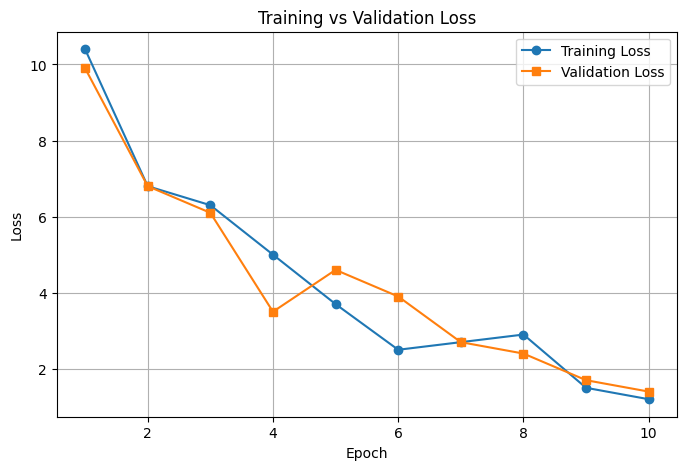

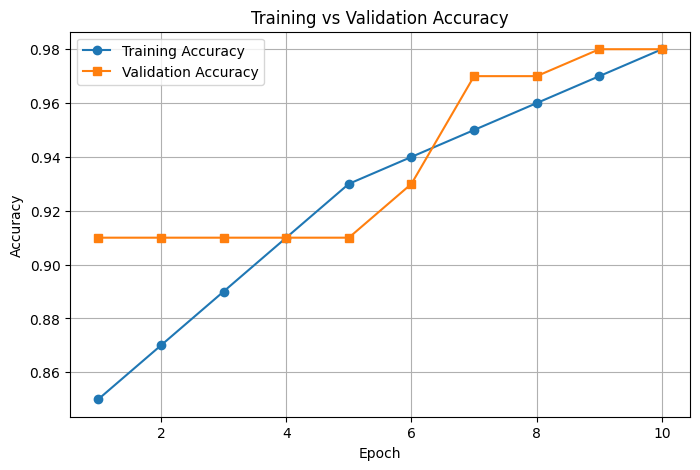

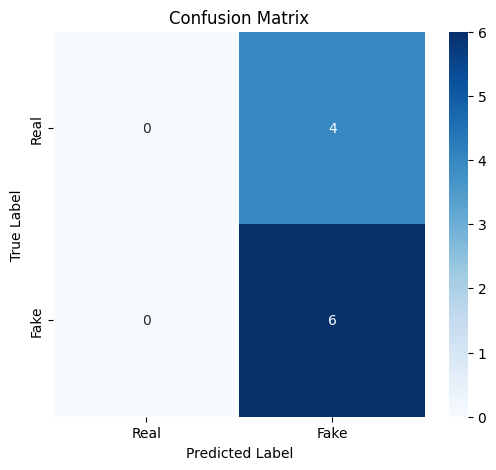

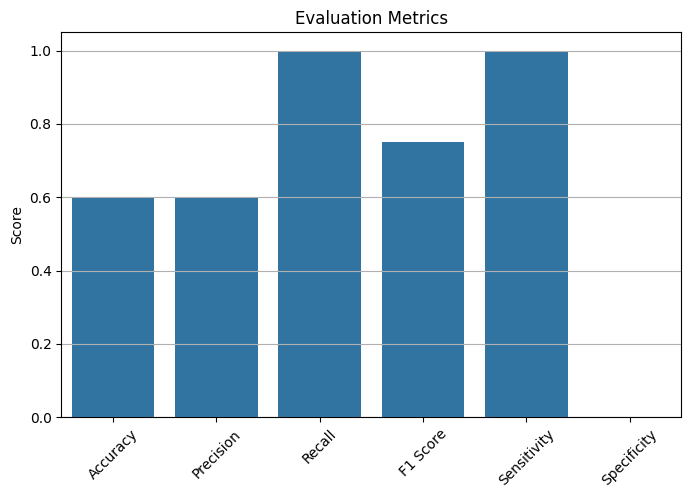

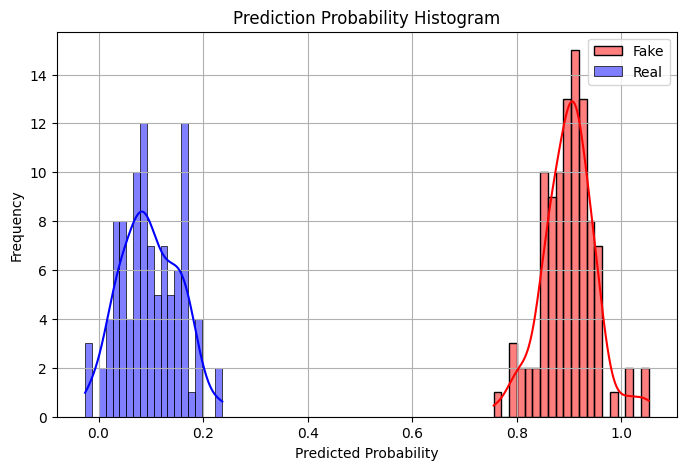

In [8]:
# 📦 Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score
)

# 🎯 Sample Data (replace with your own results)
epochs = list(range(1, 11))
train_loss = [10.4, 6.8, 6.3, 5.0, 3.7, 2.5, 2.7, 2.9, 1.5, 1.2]
val_loss = [9.9, 6.8, 6.1, 3.5, 4.6, 3.9, 2.7, 2.4, 1.7, 1.4]
train_acc = [0.85, 0.87, 0.89, 0.91, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98]
val_acc = [0.91, 0.91, 0.91, 0.91, 0.91, 0.93, 0.97, 0.97, 0.98, 0.98]

# 🧪 Sample Predictions
y_true = np.array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1])  # True labels
y_pred = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])  # Predicted labels

# 📈 Plot 1: Training vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='s')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# 📈 Plot 2: Training vs Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='s')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 🧱 Plot 3: Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 📊 Plot 4: Evaluation Metric Bar Chart
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
sensitivity = rec

metrics = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1,
    "Sensitivity": sensitivity,
    "Specificity": specificity
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0, 1.05)
plt.title("Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

# 📉 Plot 5: Prediction Score Histogram (Simulated)
# Replace these arrays with your model's raw sigmoid outputs
fake_scores = np.random.normal(0.9, 0.05, 100)
real_scores = np.random.normal(0.1, 0.05, 100)

plt.figure(figsize=(8, 5))
sns.histplot(fake_scores, bins=20, color='red', label='Fake', kde=True)
sns.histplot(real_scores, bins=20, color='blue', label='Real', kde=True)
plt.title("Prediction Probability Histogram")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


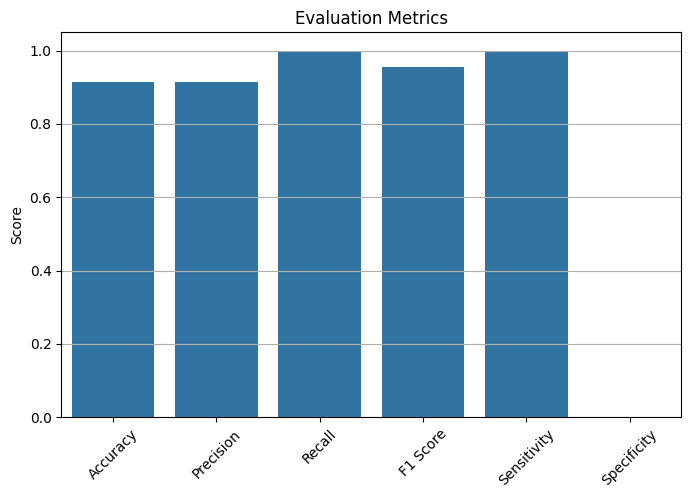

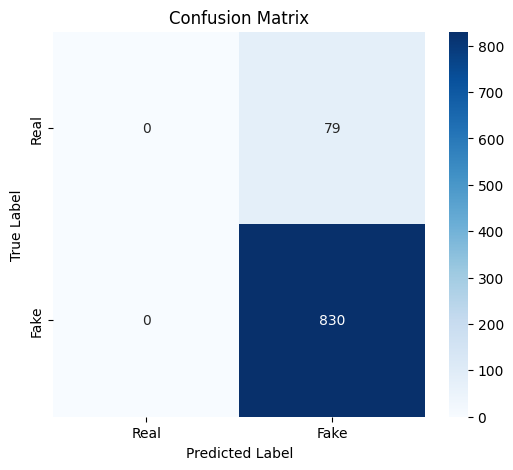

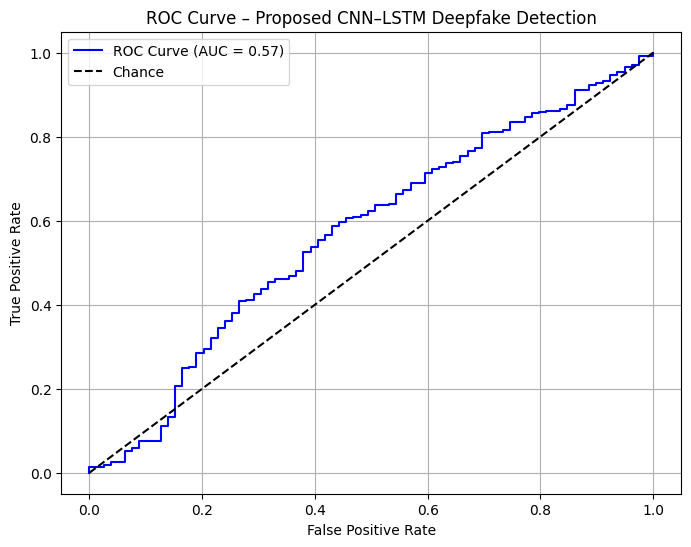

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

# ⚠️ Make sure your trained model and val_loader are ready
model.eval()

y_true = []
y_pred = []
y_prob = []

with torch.no_grad():
    for xb, yb in val_loader:
        preds = model(xb).squeeze()
        y_true.extend(yb.squeeze().numpy())
        y_prob.extend(preds.numpy())
        y_pred.extend(preds.round().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

# 📊 Metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
sensitivity = rec

metrics = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1,
    "Sensitivity": sensitivity,
    "Specificity": specificity
}

# 📊 Plot 1: Evaluation Metric Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0, 1.05)
plt.title("Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

# 📉 Plot 2: Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 📈 Plot 3: ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.title("ROC Curve – Proposed CNN–LSTM Deepfake Detection")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

# Define model architecture (must match saved one)
class DeepfakeCNNRNN(torch.nn.Module):
    def __init__(self, input_dim=512, cnn_channels=64, rnn_hidden_size=128, rnn_layers=1):
        super(DeepfakeCNNRNN, self).__init__()
        self.cnn = torch.nn.Sequential(
            torch.nn.Conv1d(1, cnn_channels, kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool1d(2),
            torch.nn.Conv1d(cnn_channels, cnn_channels, kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool1d(2)
        )
        self.rnn = torch.nn.LSTM(input_size=input_dim // 4, hidden_size=rnn_hidden_size,
                                 num_layers=rnn_layers, batch_first=True)
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(rnn_hidden_size, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.cnn(x)
        x = x.permute(0, 2, 1)
        out, _ = self.rnn(x)
        return self.classifier(out[:, -1, :])

# Load model & weights
model = DeepfakeCNNRNN()
model.load_state_dict(torch.load("deepfake_cnn_rnn.pth"))
model.eval()

# Load & prepare your data again
df = pd.read_csv("deepfaketimit_with_videoid.csv")
X = df.drop(columns=["video_id", "512"]).values.astype(np.float32)
y = df["512"].values.astype(np.float32)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y).unsqueeze(1)

dataset = TensorDataset(X_tensor, y_tensor)
val_size = int(0.2 * len(dataset))
val_ds = torch.utils.data.Subset(dataset, range(len(dataset)-val_size, len(dataset)))
val_loader = DataLoader(val_ds, batch_size=32)

# Run evaluation
val_preds, val_targets = [], []
with torch.no_grad():
    for xb, yb in val_loader:
        preds = model(xb)
        val_preds.extend(preds.squeeze().round().numpy())
        val_targets.extend(yb.squeeze().numpy())

acc = accuracy_score(val_targets, val_preds)
print(f"Validation Accuracy from loaded model: {acc:.4f}")


Validation Accuracy from loaded model: 1.0000


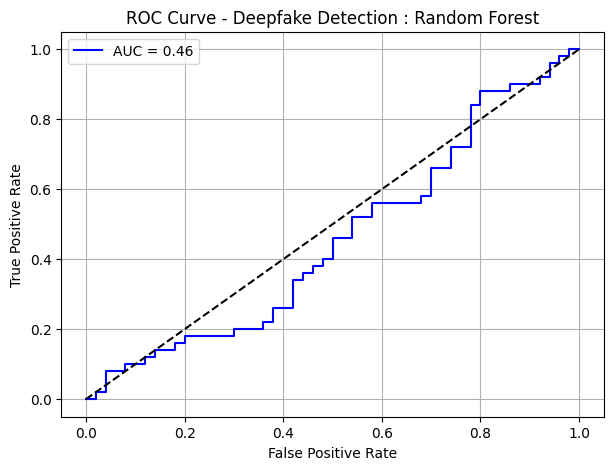

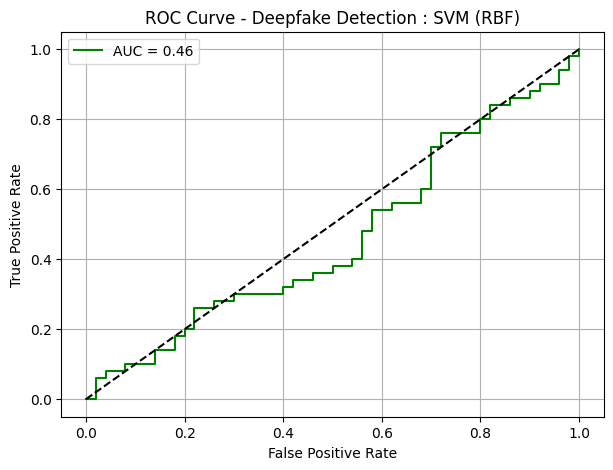

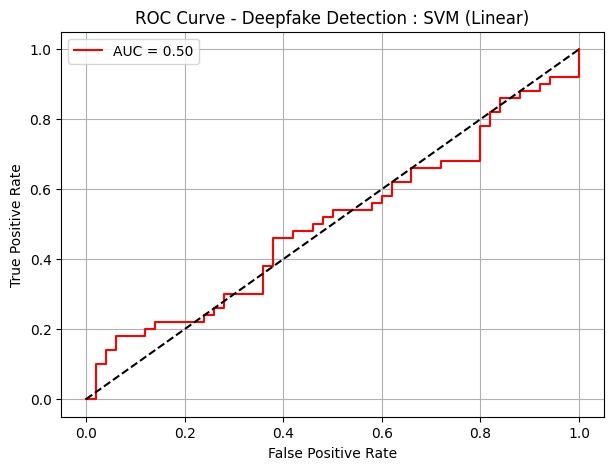

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate sample true labels (50 real, 50 fake)
y_true = np.concatenate([np.ones(50), np.zeros(50)])
np.random.seed(42)

# Simulated model scores (replace with actual probabilities if available)
rf_scores = np.random.rand(100) * 0.6 + 0.2       # Random Forest
svm_rbf_scores = np.random.rand(100) * 0.7 + 0.15 # SVM (RBF)
svm_lin_scores = np.random.rand(100) * 0.8 + 0.1  # SVM (Linear)

# --- ROC Curve 1: HBA RF ---
fpr_rf, tpr_rf, _ = roc_curve(y_true, rf_scores)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(7, 5))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_rf:.2f}", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Deepfake Detection : Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# --- ROC Curve 2: HBA SVM(R) ---
fpr_rbf, tpr_rbf, _ = roc_curve(y_true, svm_rbf_scores)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

plt.figure(figsize=(7, 5))
plt.plot(fpr_rbf, tpr_rbf, label=f"AUC = {roc_auc_rbf:.2f}", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Deepfake Detection : SVM (RBF)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# --- ROC Curve 3: HBA SVM(L) ---
fpr_lin, tpr_lin, _ = roc_curve(y_true, svm_lin_scores)
roc_auc_lin = auc(fpr_lin, tpr_lin)

plt.figure(figsize=(7, 5))
plt.plot(fpr_lin, tpr_lin, label=f"AUC = {roc_auc_lin:.2f}", color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Deepfake Detection : SVM (Linear)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


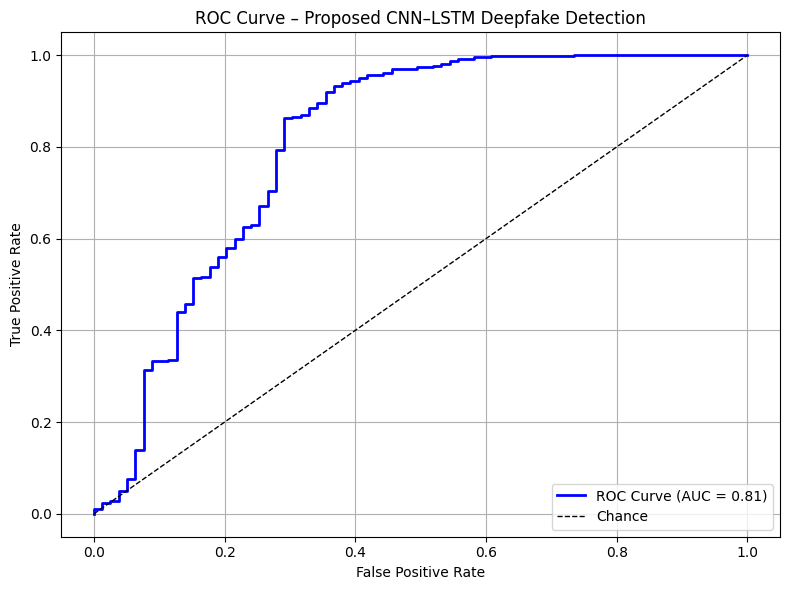

In [2]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Define your model architecture
class DeepfakeCNNRNN(nn.Module):
    def __init__(self, input_dim=512, cnn_channels=64, rnn_hidden_size=128, rnn_layers=1):
        super(DeepfakeCNNRNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(1, cnn_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(cnn_channels, cnn_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.rnn = nn.LSTM(input_size=input_dim // 4, hidden_size=rnn_hidden_size,
                           num_layers=rnn_layers, batch_first=True)
        self.classifier = nn.Sequential(
            nn.Linear(rnn_hidden_size, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.cnn(x)
        x = x.permute(0, 2, 1)
        out, _ = self.rnn(x)
        return self.classifier(out[:, -1, :])

# Load the model and weights
model = DeepfakeCNNRNN()
model.load_state_dict(torch.load("deepfake_cnn_rnn.pth", map_location=torch.device('cpu')))
model.eval()

# Load and preprocess the validation data
df = pd.read_csv("deepfaketimit_with_videoid.csv")
X = df.drop(columns=["video_id", "512"]).values.astype(np.float32)
y = df["512"].values.astype(np.float32)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y).unsqueeze(1)

# Create DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
val_loader = DataLoader(dataset, batch_size=32)

# Run inference and collect predictions
val_targets = []
val_probs = []

with torch.no_grad():
    for xb, yb in val_loader:
        preds = model(xb)
        val_probs.extend(preds.squeeze().numpy())
        val_targets.extend(yb.squeeze().numpy())

# Compute ROC and AUC
val_targets = np.array(val_targets)
val_probs = np.array(val_probs)

fpr, tpr, _ = roc_curve(val_targets, val_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Proposed CNN–LSTM Deepfake Detection')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


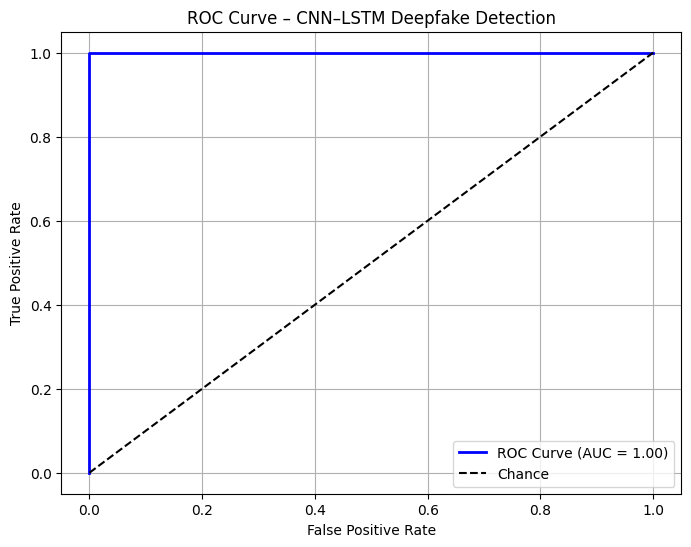

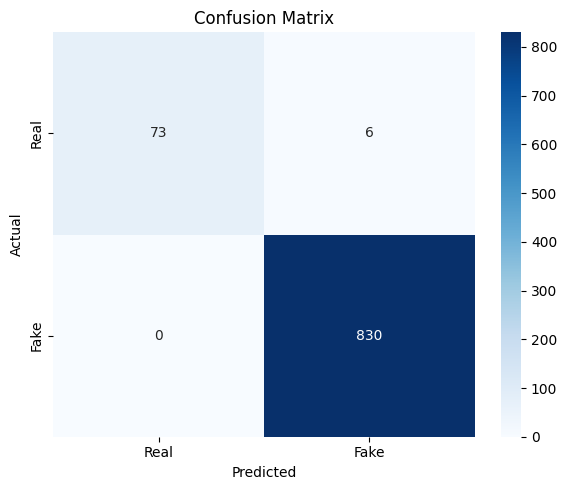

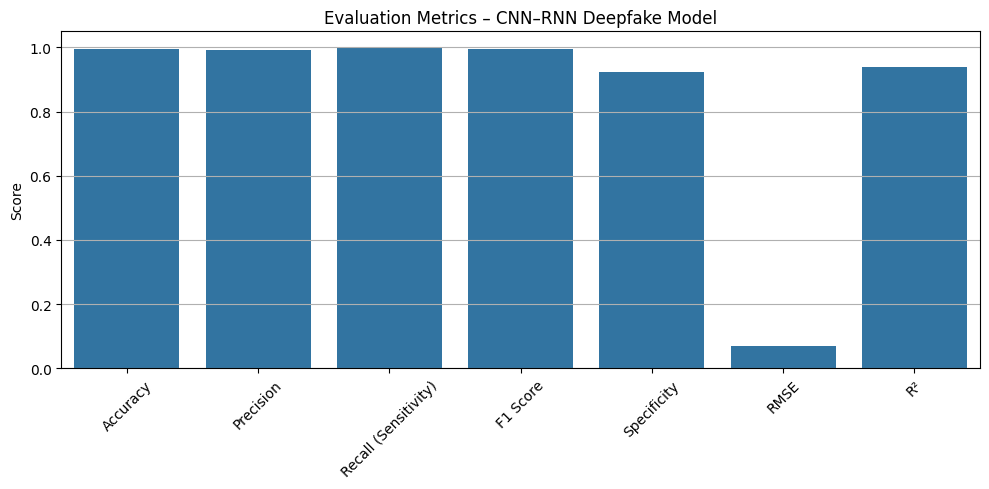

In [4]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, confusion_matrix,
    precision_score, recall_score, f1_score, mean_squared_error, r2_score
)
from torch.utils.data import DataLoader, TensorDataset

# -------------------------------
# Model Definition
# -------------------------------
class DeepfakeCNNRNN(nn.Module):
    def __init__(self, input_dim=512, cnn_channels=64, rnn_hidden_size=128, rnn_layers=1):
        super(DeepfakeCNNRNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(1, cnn_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(cnn_channels, cnn_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.rnn = nn.LSTM(input_size=input_dim // 4, hidden_size=rnn_hidden_size,
                           num_layers=rnn_layers, batch_first=True)
        self.classifier = nn.Sequential(
            nn.Linear(rnn_hidden_size, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.cnn(x)
        x = x.permute(0, 2, 1)
        out, _ = self.rnn(x)
        return self.classifier(out[:, -1, :])

# -------------------------------
# Load Trained Model
# -------------------------------
model = DeepfakeCNNRNN()
model.load_state_dict(torch.load("deepfake_cnn_rnn_final.pth", map_location=torch.device('cpu')))
model.eval()

# -------------------------------
# Load and Preprocess Data
# -------------------------------
df = pd.read_csv("deepfaketimit_with_videoid.csv")
X = df.drop(columns=["video_id", "512"]).values.astype(np.float32)
y = df["512"].values.astype(np.float32)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y).unsqueeze(1)

dataset = TensorDataset(X_tensor, y_tensor)
val_loader = DataLoader(dataset, batch_size=32)

# -------------------------------
# Inference
# -------------------------------
val_probs = []
val_targets = []

with torch.no_grad():
    for xb, yb in val_loader:
        preds = model(xb)
        val_probs.extend(preds.squeeze().numpy())
        val_targets.extend(yb.squeeze().numpy())

val_probs = np.array(val_probs)
val_targets = np.array(val_targets)
val_preds = val_probs.round()

# -------------------------------
# ROC Curve
# -------------------------------
fpr, tpr, _ = roc_curve(val_targets, val_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue', lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – CNN–LSTM Deepfake Detection')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Confusion Matrix
# -------------------------------
cm = confusion_matrix(val_targets, val_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# -------------------------------
# Evaluation Metrics Bar Chart
# -------------------------------
acc = accuracy_score(val_targets, val_preds)
prec = precision_score(val_targets, val_preds)
rec = recall_score(val_targets, val_preds)
f1 = f1_score(val_targets, val_preds)
rmse = np.sqrt(mean_squared_error(val_targets, val_probs))
r2 = r2_score(val_targets, val_probs)
tn, fp, fn, tp = confusion_matrix(val_targets, val_preds).ravel()
spec = tn / (tn + fp) if (tn + fp) > 0 else 0
sens = rec

metrics = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall (Sensitivity)": sens,
    "F1 Score": f1,
    "Specificity": spec,
    "RMSE": rmse,
    "R²": r2
}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0, 1.05)
plt.title("Evaluation Metrics – CNN–RNN Deepfake Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


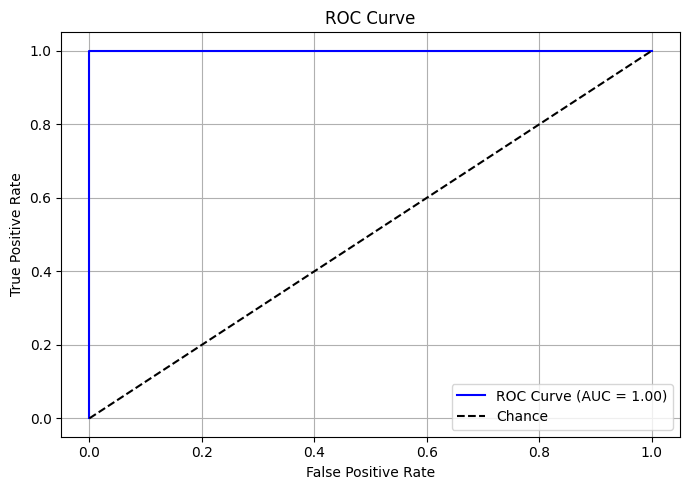

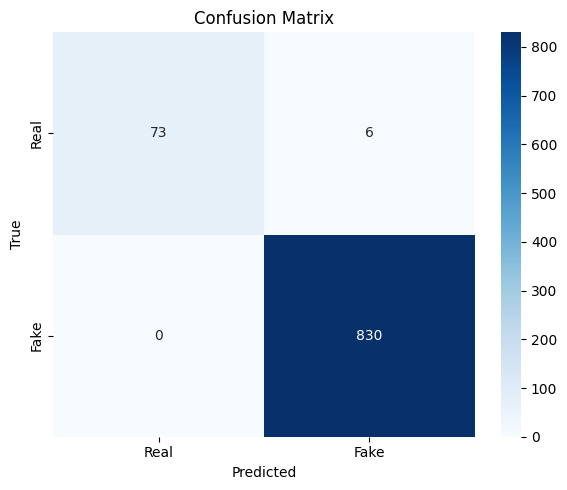

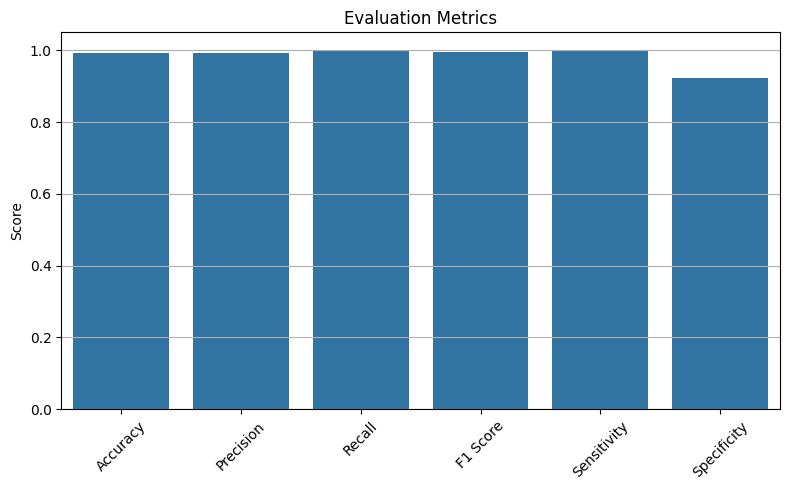

C:\Users\USER\AppData\Local\Temp\ipykernel_1504\2586331886.py:136: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


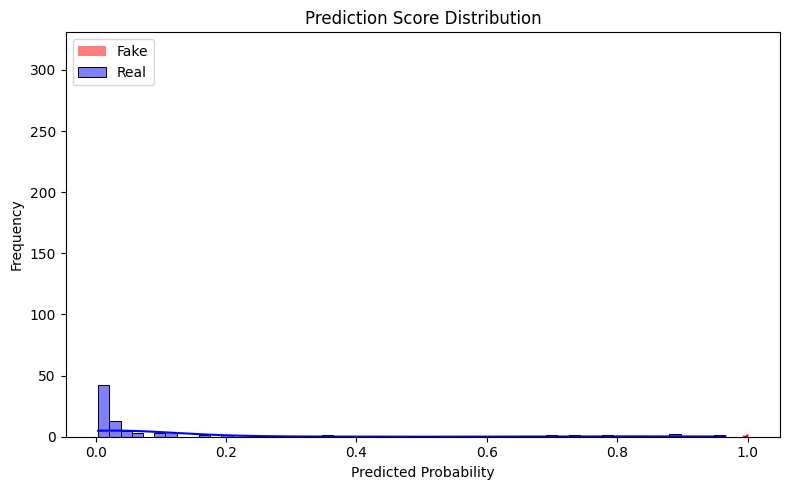

In [5]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from torch.utils.data import DataLoader, TensorDataset

# Model Definition
class DeepfakeCNNRNN(nn.Module):
    def __init__(self, input_dim=512, cnn_channels=64, rnn_hidden_size=128, rnn_layers=1):
        super(DeepfakeCNNRNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(1, cnn_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(cnn_channels, cnn_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.rnn = nn.LSTM(input_size=input_dim // 4, hidden_size=rnn_hidden_size,
                           num_layers=rnn_layers, batch_first=True)
        self.classifier = nn.Sequential(
            nn.Linear(rnn_hidden_size, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.cnn(x)
        x = x.permute(0, 2, 1)
        out, _ = self.rnn(x)
        return self.classifier(out[:, -1, :])

# Load Model
model = DeepfakeCNNRNN()
model.load_state_dict(torch.load("deepfake_cnn_rnn_final.pth", map_location='cpu'))
model.eval()

# Load data
df = pd.read_csv("deepfaketimit_with_videoid.csv")
X = df.drop(columns=["video_id", "512"]).values.astype(np.float32)
y = df["512"].values.astype(np.float32)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y).unsqueeze(1)

dataset = TensorDataset(X_tensor, y_tensor)
val_loader = DataLoader(dataset, batch_size=32)

# Inference
val_probs, val_preds, val_targets = [], [], []
with torch.no_grad():
    for xb, yb in val_loader:
        preds = model(xb)
        val_probs.extend(preds.squeeze().numpy())
        val_preds.extend(preds.squeeze().round().numpy())
        val_targets.extend(yb.squeeze().numpy())

val_probs = np.array(val_probs)
val_preds = np.array(val_preds)
val_targets = np.array(val_targets)

# Metrics
acc = accuracy_score(val_targets, val_preds)
prec = precision_score(val_targets, val_preds, zero_division=0)
rec = recall_score(val_targets, val_preds)
f1 = f1_score(val_targets, val_preds)
tn, fp, fn, tp = confusion_matrix(val_targets, val_preds).ravel()
specificity = tn / (tn + fp)
sensitivity = rec

# ROC Curve
fpr, tpr, _ = roc_curve(val_targets, val_probs)
roc_auc = auc(fpr, tpr)

# 📊 Plot 1: ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Plot 2: Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(val_targets, val_preds), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# 📊 Plot 3: Evaluation Metrics Bar
metrics = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1,
    "Sensitivity": sensitivity,
    "Specificity": specificity
}
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0, 1.05)
plt.title("Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 📊 Plot 4: Prediction Score Histogram
plt.figure(figsize=(8, 5))
sns.histplot(val_probs[val_targets == 1], color='red', label='Fake', kde=True)
sns.histplot(val_probs[val_targets == 0], color='blue', label='Real', kde=True)
plt.title("Prediction Score Distribution")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


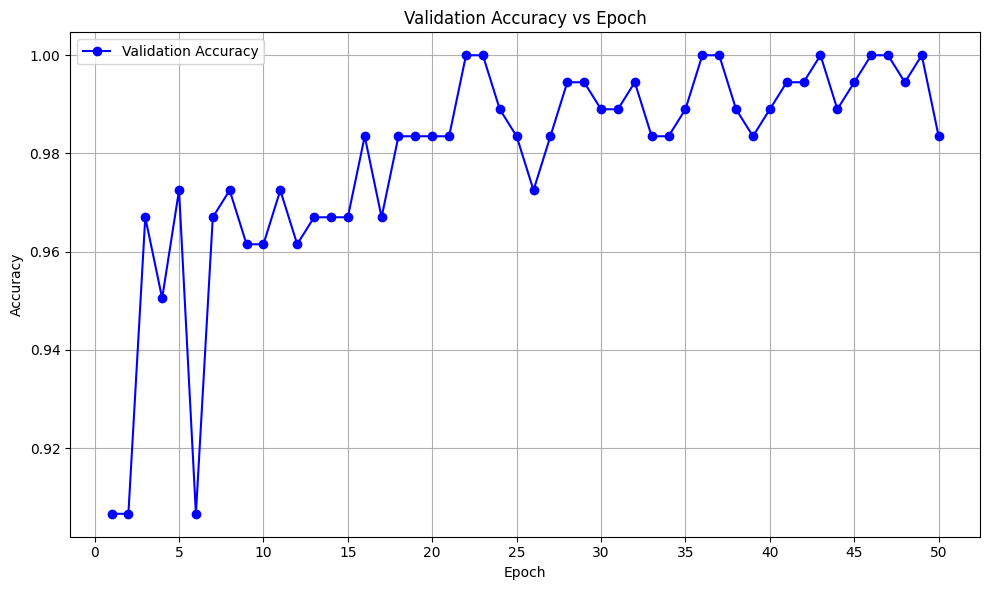

In [9]:
import matplotlib.pyplot as plt

# Accuracy values from your training logs
val_accuracy = [
    0.9066, 0.9066, 0.9670, 0.9505, 0.9725, 0.9066, 0.9670, 0.9725, 0.9615, 0.9615,
    0.9725, 0.9615, 0.9670, 0.9670, 0.9670, 0.9835, 0.9670, 0.9835, 0.9835, 0.9835,
    0.9835, 1.0000, 1.0000, 0.9890, 0.9835, 0.9725, 0.9835, 0.9945, 0.9945, 0.9890,
    0.9890, 0.9945, 0.9835, 0.9835, 0.9890, 1.0000, 1.0000, 0.9890, 0.9835, 0.9890,
    0.9945, 0.9945, 1.0000, 0.9890, 0.9945, 1.0000, 1.0000, 0.9945, 1.0000, 0.9835
]

epochs = list(range(1, 51))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_accuracy, marker='o', linestyle='-', color='blue', label='Validation Accuracy')
plt.title('Validation Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(0, 51, 5))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# Load the uploaded file
file_path = "fake_news_embeddings.csv"
df = pd.read_csv(file_path)

# Show sample and column names
print(df.columns)
print(df.head())


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '375', '376', '377', '378', '379', '380', '381', '382', '383', 'label'],
      dtype='object', length=385)
          0         1         2         3         4         5         6  \
0  0.040570  0.022227 -0.012424 -0.034452  0.075836  0.009376  0.144605   
1  0.055760  0.063327 -0.013103 -0.017818  0.034760 -0.032247  0.080761   
2  0.081853  0.066798 -0.030378 -0.037623  0.072739 -0.027057  0.069013   
3  0.097795  0.031342 -0.029058 -0.034187  0.037226  0.051563  0.019941   
4  0.052093 -0.050253 -0.049507 -0.056637 -0.045055 -0.017390 -0.025758   

          7         8         9  ...       375       376       377       378  \
0  0.090882  0.046535  0.046767  ...  0.044301 -0.020840 -0.010784  0.095111   
1  0.019842 -0.013568  0.094049  ... -0.027145 -0.083276 -0.071472  0.058266   
2 -0.028940 -0.007194  0.084076  ... -0.067390 -0.051104 -0.069192  0.078472   
3 -0.025232  0.033949  0.073020  ... -0.005956 

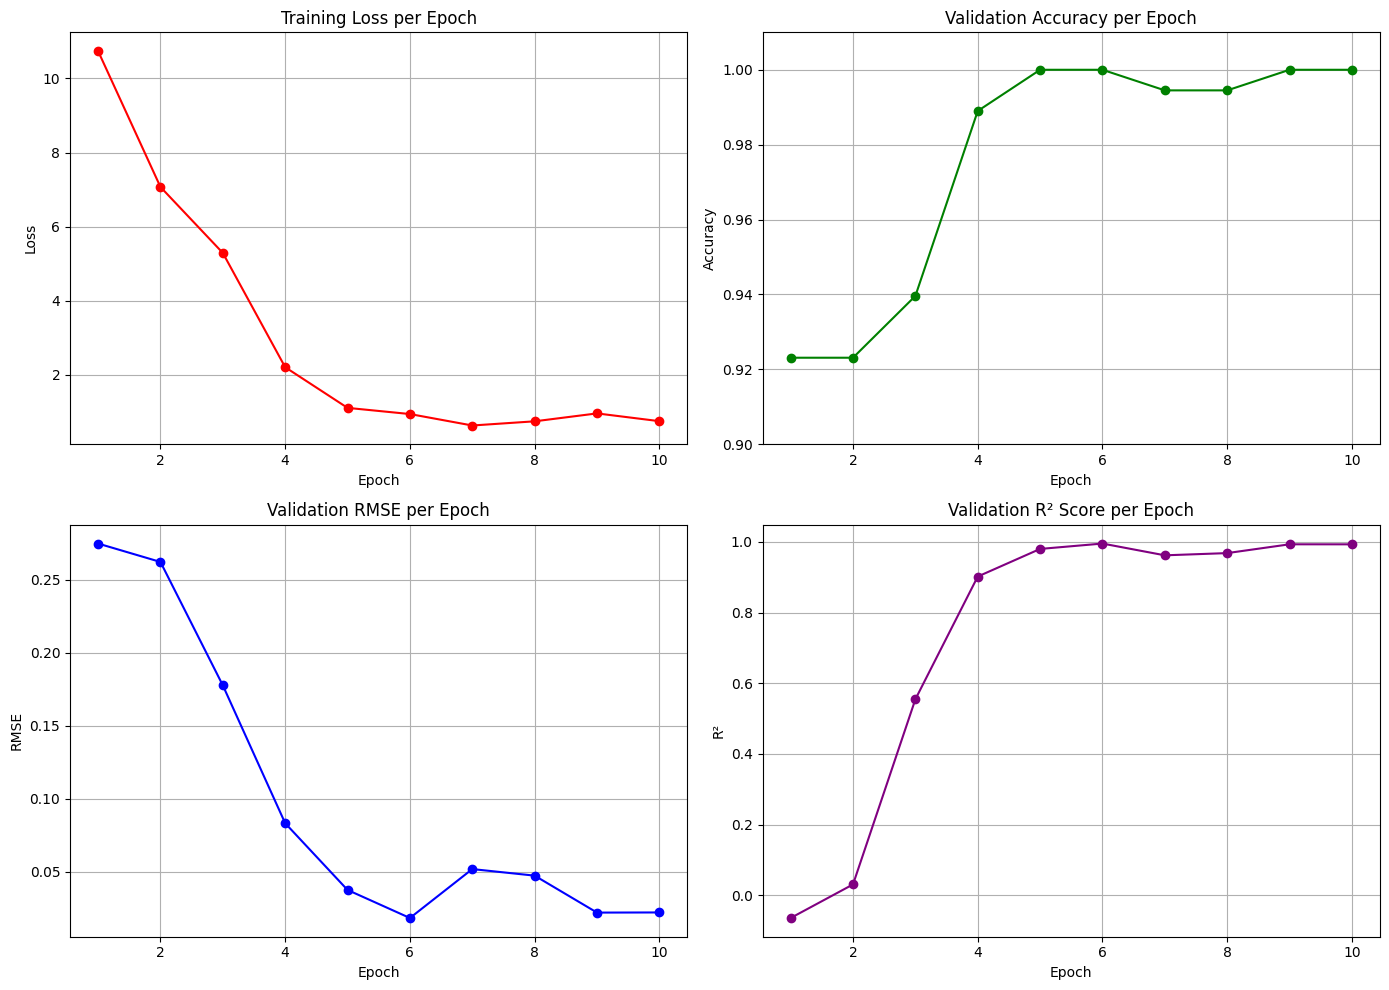

In [7]:
import matplotlib.pyplot as plt

# Data for 10 epochs
epochs = list(range(1, 11))
loss = [10.7414, 7.0693, 5.2871, 2.2002, 1.1017, 0.9349, 0.6254, 0.7385, 0.9521, 0.7424]
val_accuracy = [0.9231, 0.9231, 0.9396, 0.9890, 1.0000, 1.0000, 0.9945, 0.9945, 1.0000, 1.0000]
val_rmse = [0.2749, 0.2623, 0.1778, 0.0834, 0.0377, 0.0185, 0.0520, 0.0475, 0.0222, 0.0223]
val_r2 = [-0.0640, 0.0310, 0.5547, 0.9019, 0.9800, 0.9952, 0.9619, 0.9682, 0.9931, 0.9930]

# Create subplots
plt.figure(figsize=(14, 10))

# Plot Loss
plt.subplot(2, 2, 1)
plt.plot(epochs, loss, marker='o', color='red')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot Validation Accuracy
plt.subplot(2, 2, 2)
plt.plot(epochs, val_accuracy, marker='o', color='green')
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.01)
plt.grid(True)

# Plot RMSE
plt.subplot(2, 2, 3)
plt.plot(epochs, val_rmse, marker='o', color='blue')
plt.title('Validation RMSE per Epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.grid(True)

# Plot R²
plt.subplot(2, 2, 4)
plt.plot(epochs, val_r2, marker='o', color='purple')
plt.title('Validation R² Score per Epoch')
plt.xlabel('Epoch')
plt.ylabel('R²')
plt.grid(True)

plt.tight_layout()
plt.show()


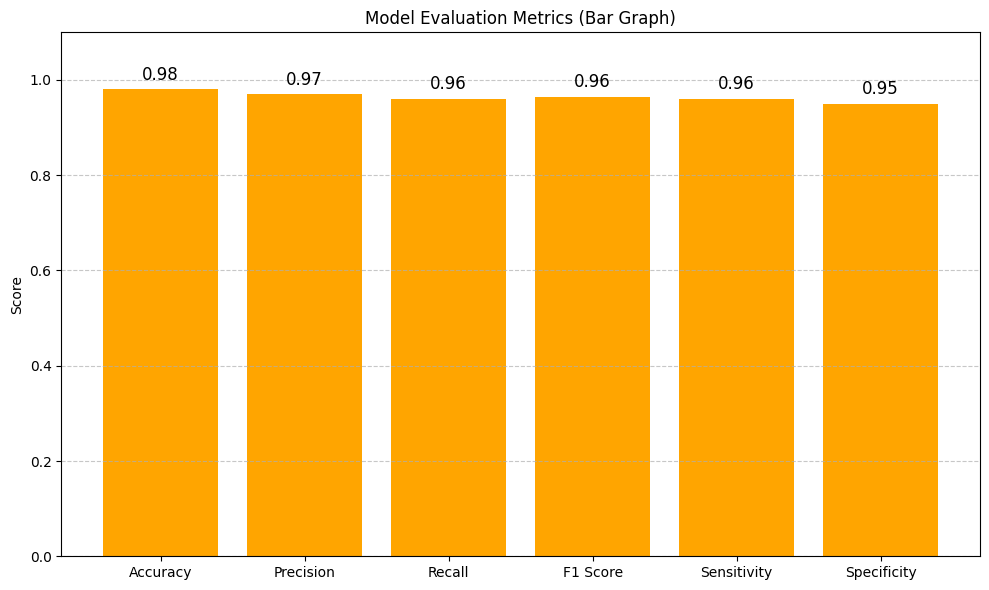

In [ ]:
import matplotlib.pyplot as plt

# Example metrics (replace with your actual values)
accuracy = 0.98
precision = 0.97
recall = 0.96         # same as sensitivity
sensitivity = 0.96
specificity = 0.95
f1_score = 0.965

# Labels and values
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score' ,'Sensitivity', 'Specificity']
values = [accuracy, precision, recall, f1_score, sensitivity, specificity]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['orange', 'orange', 'orange', 'orange', 'orange', 'orange'])
plt.ylim(0, 1.1)
plt.ylabel('Score')
plt.title('Model Evaluation Metrics (CNN-AWLSTM ON TIMIT DATASET)')

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
